#### Prepared for Gabor's Data Analysis

### Data Analysis for Business, Economics, and Policy
by Gabor Bekes and  Gabor Kezdi
 
Cambridge University Press 2021

**[gabors-data-analysis.com ](https://gabors-data-analysis.com/)**

 License: Free to share, modify and use for educational purposes. 
 Not to be used for commercial purposes.

### Chapter 06
**CH06A Comparing Online and Offline Prices: Testing the Difference**

billion-prices dataset dataset

version 1.0 2021-05-05

In [1]:
import os
import sys
import warnings

import numpy as np
import pandas as pd
from mizani.formatters import percent_format
from plotnine import *

warnings.filterwarnings("ignore")


In [2]:
data = pd.read_csv("/workspaces/codespaces-jupyter/data/online_offline_ALL_clean.csv", encoding="latin1")
# data = pd.read_csv("https://osf.io/yhbr5/download", encoding="latin1")


In [3]:
# FILTER DATA
data = data.loc[
 (data["COUNTRY"] == "USA")
    & (data["PRICETYPE"] == "Regular Price")
    & (data["sale_online"].isnull())
    & (data["price"].notna())
    & (data["price_online"].notna())
]


In [4]:
# Drop obvious errors
data = data.loc[data["price"] < 1000]


In [5]:
# Compare variables
data["diff"] = data["price_online"] - data["price"]
descr = data["diff"].describe()


In [6]:
descr

count    6439.000000
mean        0.054460
std         9.994452
min      -380.130000
25%        -0.040000
50%         0.000000
75%         0.000000
max       415.270000
Name: diff, dtype: float64

In [7]:
data[data["diff"] > 0]

,COUNTRY,retailer,retailer_s,date,day,month,year,id,price,price_online,...,TIME,ZIPCODE,PHOTO,OTHERSKUITEM,COMMENTS,PRICETYPE,CODE,sale_online,country_s,diff
25128,USA,44,USA_44,2015-10-30,30.0,10.0,2015.0,555778,79.50,89.50,...,16:53,02141,20151030_165322.jpg,555778,NaN,Regular Price,112190.0,NaN,USA,10.00
25168,USA,44,USA_44,2015-11-13,13.0,11.0,2015.0,722706,61.60,88.00,...,14:05,02141,20151113_140601.jpg,722706,NaN,Regular Price,112190.0,NaN,USA,26.40
25193,USA,44,USA_44,2015-11-23,23.0,11.0,2015.0,724004,28.00,228.00,...,16:40,98101,20151123_164041.jpg,724004,NaN,Regular Price,856681.0,NaN,USA,200.00
25240,USA,44,USA_44,2016-01-11,11.0,1.0,2016.0,179577,118.00,138.00,...,14:45,02139,20160111_144538.jpg,179577,NaN,Regular Price,144211.0,NaN,USA,20.00
25242,USA,44,USA_44,2016-01-11,11.0,1.0,2016.0,181238,78.00,88.00,...,14:44,02139,20160111_144443.jpg,181238,NaN,Regular Price,144211.0,NaN,USA,10.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45145,USA,62,USA_62,2015-11-07,7.0,11.0,2015.0,551733334,6.42,7.80,...,16:41,01701,20151107_164207.jpg,551733334,NaN,Regular Price,112190.0,NaN,USA,1.38
45185,USA,62,USA_62,2015-12-05,5.0,12.0,2015.0,1102320,10.88,14.74,...,15:40,01701,20151205_154008.jpg,1102320,NaN,Regular Price,112190.0,NaN,USA,3.86
45188,USA,62,USA_62,2015-12-05,5.0,12.0,2015.0,2.97,2.97,33.99,...,15:26,01701,20151205_152611.jpg,2.97,3500039013,Regular Price,112190.0,NaN,USA,31.02
45221,USA,62,USA_62,2015-12-05,5.0,12.0,2015.0,8204162,1.77,11.99,...,15:42,01701,20151205_154237.jpg,8204162,NaN,Regular Price,112190.0,NaN,USA,10.22


In [8]:
# Show products with duplicate 'id' values (not unique products)
duplicate_products = data[data.duplicated(subset='id', keep=False)]
duplicate_products

,COUNTRY,retailer,retailer_s,date,day,month,year,id,price,price_online,...,TIME,ZIPCODE,PHOTO,OTHERSKUITEM,COMMENTS,PRICETYPE,CODE,sale_online,country_s,diff
25098,USA,44,USA_44,2015-10-24,24.0,10.0,2015.0,506714,178.00,178.00,...,18:04,02141,20151024_180436.jpg,506714,NaN,Regular Price,112190.0,NaN,USA,0.0
25103,USA,44,USA_44,2015-10-24,24.0,10.0,2015.0,673036,118.00,118.00,...,18:18,02141,20151024_181821.jpg,673036,NaN,Regular Price,112190.0,NaN,USA,0.0
25122,USA,44,USA_44,2015-10-30,30.0,10.0,2015.0,172066,79.50,79.50,...,17:24,02141,20151030_172413.jpg,172066,NaN,Regular Price,112190.0,NaN,USA,0.0
25127,USA,44,USA_44,2015-10-30,30.0,10.0,2015.0,506714,178.00,178.00,...,16:40,02141,20151030_164029.jpg,506714,NaN,Regular Price,112190.0,NaN,USA,0.0
25142,USA,44,USA_44,2015-10-30,30.0,10.0,2015.0,722773,69.50,69.50,...,17:15,02141,20151030_171541.jpg,722773,NaN,Regular Price,112190.0,NaN,USA,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45233,USA,62,USA_62,2015-12-11,11.0,12.0,2015.0,551391584,3.96,3.96,...,17:59,01701,20151211_175957.jpg,551391584,NaN,Regular Price,112190.0,NaN,USA,0.0
45239,USA,62,USA_62,2015-12-11,11.0,12.0,2015.0,552014602,2.98,2.98,...,18:01,01701,20151211_180156.jpg,552014602,NaN,Regular Price,112190.0,NaN,USA,0.0
45242,USA,62,USA_62,2015-12-11,11.0,12.0,2015.0,552145280,3.88,3.88,...,18:01,01701,20151211_180133.jpg,552145280,NaN,Regular Price,112190.0,NaN,USA,0.0
45246,USA,62,USA_62,2015-12-11,11.0,12.0,2015.0,552915866,9.78,9.78,...,18:11,01701,20151211_181123.jpg,552915866,NaN,Regular Price,112190.0,NaN,USA,0.0


In [9]:
# Statistic with n observations (products) in the data:
# products count
# using pandas nunique for clarity:
# data["id"].nunique()
#well i was intitally foing analysis among unique products id.unique but realized authors of the textbook skipped this part and did across all samples - 6439
#which does not make sense to me

l=len(data["id"].unique())

# statistic mean(diff)

pdiff_mean=data["diff"].sum()/l #I think should be right
s=round(data["diff"].sum()/6439,2) #lol
s

np.float64(0.05)

In [ ]:
(
    ggplot(data, aes("diff"))
    + geom_histogram(
        binwidth=5,
        boundary=0,
        fill="blue",
        size=0.25,
        alpha=0.8,
        show_legend=False,
        na_rm=True,
        closed="left",
    )
    + labs(x="Online - offline price difference (US dollars)", y="Frequency")
    + theme_bw()
    + scale_x_continuous(limits=(-420, 420), breaks=np.arange(-400, 420,100))
    + scale_y_continuous(
        limits=(0, 6000), breaks=np.arange(0, 6000, 1000), expand=(0.01, 0.01)
    )
    + geom_segment(aes(x=300, y=500, xend=415, yend=20), arrow=arrow())
    + annotate("text", x=300, y=700, label="max value= 415", size=11.5)
    + geom_segment(aes(x=-280, y=500, xend=-380, yend=20), arrow=arrow())
    + annotate("text", x=-300, y=700, label="min value= -380", size=11.5)
)


In [ ]:
# 4.99999 not 5 -- needed because of data imported from stata may be stored wierdly.
data1 = data.loc[abs(data["diff"]) < 4.999999]
data1["diff"].describe()


count    6200.000000
mean       -0.127437
std         0.788358
min        -4.900000
25%         0.000000
50%         0.000000
75%         0.000000
max         4.990000
Name: diff, dtype: float64

In [ ]:
data1

,COUNTRY,retailer,retailer_s,date,day,month,year,id,price,price_online,...,TIME,ZIPCODE,PHOTO,OTHERSKUITEM,COMMENTS,PRICETYPE,CODE,sale_online,country_s,diff
25096,USA,44,USA_44,2015-10-24,24.0,10.0,2015.0,214305,98.00,98.00,...,18:11,02141,20151024_181126.jpg,214305,NaN,Regular Price,112190.0,NaN,USA,0.0
25098,USA,44,USA_44,2015-10-24,24.0,10.0,2015.0,506714,178.00,178.00,...,18:04,02141,20151024_180436.jpg,506714,NaN,Regular Price,112190.0,NaN,USA,0.0
25102,USA,44,USA_44,2015-10-24,24.0,10.0,2015.0,672206,148.00,148.00,...,17:50,02141,20151024_175122.jpg,672206,NaN,Regular Price,112190.0,NaN,USA,0.0
25103,USA,44,USA_44,2015-10-24,24.0,10.0,2015.0,673036,118.00,118.00,...,18:18,02141,20151024_181821.jpg,673036,NaN,Regular Price,112190.0,NaN,USA,0.0
25121,USA,44,USA_44,2015-10-30,30.0,10.0,2015.0,171131,178.00,178.00,...,17:21,02141,20151030_172118.jpg,171131,NaN,Regular Price,112190.0,NaN,USA,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45233,USA,62,USA_62,2015-12-11,11.0,12.0,2015.0,551391584,3.96,3.96,...,17:59,01701,20151211_175957.jpg,551391584,NaN,Regular Price,112190.0,NaN,USA,0.0
45239,USA,62,USA_62,2015-12-11,11.0,12.0,2015.0,552014602,2.98,2.98,...,18:01,01701,20151211_180156.jpg,552014602,NaN,Regular Price,112190.0,NaN,USA,0.0
45242,USA,62,USA_62,2015-12-11,11.0,12.0,2015.0,552145280,3.88,3.88,...,18:01,01701,20151211_180133.jpg,552145280,NaN,Regular Price,112190.0,NaN,USA,0.0
45246,USA,62,USA_62,2015-12-11,11.0,12.0,2015.0,552915866,9.78,9.78,...,18:11,01701,20151211_181123.jpg,552915866,NaN,Regular Price,112190.0,NaN,USA,0.0


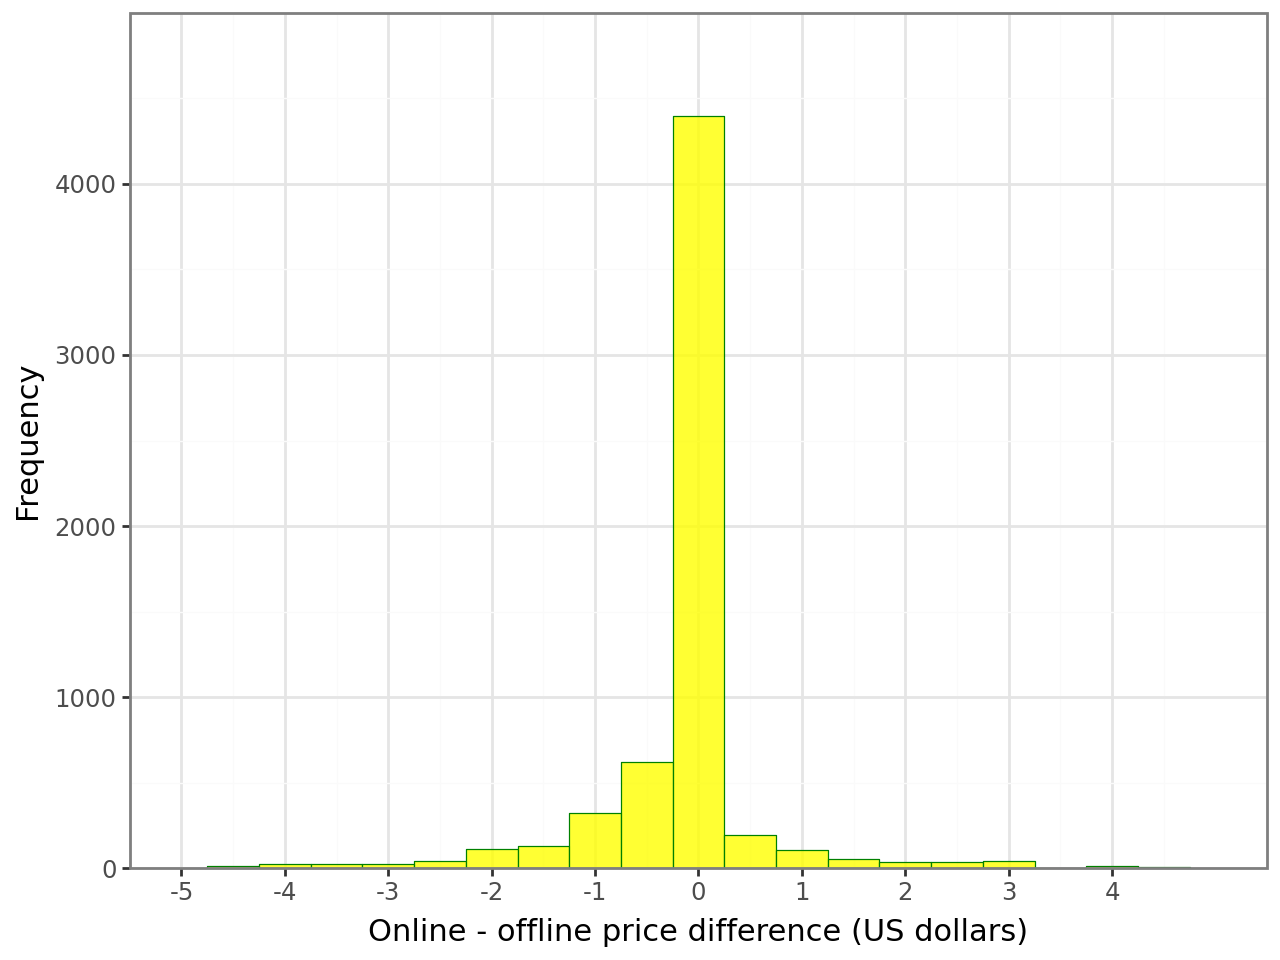

In [ ]:
(
    ggplot(data, aes("diff"))
    + geom_histogram(
        binwidth=0.5,
        center=0.5,
        color="green",
        fill="yellow",
        size=0.25,
        alpha=0.8,
        show_legend=False,
        na_rm=True,
    )
    + labs(x="Online - offline price difference (US dollars)", y="Frequency")
    + theme_bw()
    + expand_limits(x=0.01, y=0.01)
    + scale_x_continuous(limits=(-5, 5), breaks=np.arange(-5, 5, 1))
    + scale_y_continuous(expand=(0.00, 0.00),limits=(0, 5000), breaks=np.arange(0, 5000, 1000))
)


## t statistics

In [ ]:
# calc mean
mean=-round(data["diff"].mean(),3)
mean

np.float64(-0.054)

In [ ]:
#calc SE
#SE = (1 / sqrt (n)) * std
std = round(data["diff"].std(), 3)
n = data["diff"].count()
SE = round((1 / np.sqrt(n)) * std,3)
SE

np.float64(0.125)

In [ ]:
#calc t test
t = -mean/SE
t
# here we dont reject the null hyp of 0 diff

np.float64(0.432)

In [ ]:
from scipy import stats

# Calculate the p-value for the mean difference using a one-sample t-test
p_value = stats.ttest_1samp(data["diff"], 0).pvalue
p_value

np.float64(0.6619460766193054)

## Conf Interval

In [ ]:
ci_lower_se = mean - 2 * SE
ci_upper_se = mean + 2 * SE

print(f"Approximate 95% CI using SE*2: [{ci_lower_se:.4f}, {ci_upper_se:.4f}]")

Approximate 95% CI using SE*2: [-0.3040, 0.1960]


In [ ]:
t_stat = data[]

SyntaxError: invalid syntax (2247945585.py, line 1)

In [ ]:
# HYPOTHESIS
from scipy import stats

stats.ttest_1samp(data["diff"], 0)


TtestResult(statistic=np.float64(0.4372481266029261), pvalue=np.float64(0.6619460766193054), df=np.int64(6438))

In [ ]:
def t_test_1samp(series, mu=0):
    """
    This is a function to calculate t_test for 1 sample.
    Return: tuple of 2 elements, first is sample mean, second is t test object from scipy
    """
    return (np.mean(series), stats.ttest_1samp(series, mu))


In [ ]:
# MULTIPLE HYPOTHESES
spd = [data.loc[data["retailer"] == x] for x in set(data["retailer"])]
out = [(set(x["retailer"]), t_test_1samp(x["diff"], 0)) for x in spd]

In [ ]:
out


[({44},
  (np.float64(3.73675),
   TtestResult(statistic=np.float64(2.0970967695735117), pvalue=np.float64(0.038102345149389), df=np.int64(119)))),
 ({45},
  (np.float64(-1.2166300366300367),
   TtestResult(statistic=np.float64(-1.2271928388565805), pvalue=np.float64(0.22027995382690432), df=np.int64(545)))),
 ({46},
  (np.float64(-0.4290707648320227),
   TtestResult(statistic=np.float64(-11.641716539786147), pvalue=np.float64(5.8008651517374406e-30), df=np.int64(1398)))),
 ({47},
  (np.float64(0.051625239005736144),
   TtestResult(statistic=np.float64(1.6613855468290473), pvalue=np.float64(0.09723645884012402), df=np.int64(522)))),
 ({48},
  (np.float64(0.42059701492537316),
   TtestResult(statistic=np.float64(2.132197897818741), pvalue=np.float64(0.03390329067089751), df=np.int64(267)))),
 ({49},
  (np.float64(2.410042735042735),
   TtestResult(statistic=np.float64(1.2798236568799926), pvalue=np.float64(0.20187999009028337), df=np.int64(233)))),
 ({50},
  (np.float64(0.60601167315175

In [ ]:
# Create a summary DataFrame from 'out'
import pandas as pd

# Extract relevant info from 'out'
table_out = pd.DataFrame([
	{
		"retailer": list(retailer_set)[0] if len(retailer_set) == 1 else str(retailer_set),
		"estimate": result[0],
		"t_stat": result[1].statistic,
		"p.value": result[1].pvalue
	}
	for retailer_set, result in out
])

# Round the columns as needed
table_out_rounded = table_out.copy()
table_out_rounded["estimate"] = table_out_rounded["estimate"].round(3)
table_out_rounded["p.value"] = table_out_rounded["p.value"].round(4)
table_out_rounded


,retailer,estimate,t_stat,p.value
0,44,3.737,2.097097,0.0381
1,45,-1.217,-1.227193,0.2203
2,46,-0.429,-11.641717,0.0000
3,47,0.052,1.661386,0.0972
4,48,0.421,2.132198,0.0339
5,49,2.410,1.279824,0.2019
6,50,0.606,1.640533,0.1015
7,51,0.284,1.875482,0.0616
8,53,-0.970,-2.730546,0.0073
9,54,-0.028,-0.253362,0.8005


In [ ]:
from scipy.stats import t

# Example: two samples of size 10 → df = 10 + 10 - 2 = 18
df = 18
confidence = 0.95

# For two-sided test: divide alpha by 2
alpha = 1 - confidence
t_crit = t.ppf(1 - alpha/2, df)

print(t_crit)


2.10092204024096


# t test another example

## with outlier = 100

In [ ]:
# some groups

a1 = {10, 11, 12, 13, 14, 100}
b1 = {10, 11, 12, 13, 14, 15}

In [ ]:
# finding mean

a1_mean = np.mean(list(a1)) # with outlier
b1_mean = np.mean(list(b1))


a1_list = list(a1) # without outlier
a1_excl_last = a1_list[-5:6]
a1_mean_out = np.mean(a1_excl_last)

a1_mean, b1_mean,a1_mean_out,a1_excl_last

(np.float64(26.666666666666668),
 np.float64(12.5),
 np.float64(12.0),
 [10, 11, 12, 13, 14])

In [ ]:
# calc n-s
ab1n = len(a1)
a1n = len(a1_excl_last)

ab1n,a1n

(6, 5)

In [ ]:
# calc SE 

a1_std = np.std(list(a1))
b1_std = np.std(list(b1))
a1_std_out = np.std(a1_excl_last)

#a1_std,b1_std,a1_std_out

# with outlier
SE_out_1 = np.sqrt((a1_std**2)/ab1n + (b1_std**2)/ab1n)

# without outlier
SE_nout_1 = np.sqrt((a1_std_out**2)/a1n + (b1_std**2)/ab1n)

SE_out_1, SE_nout_1

(np.float64(13.417270517812037), np.float64(0.9413347497628626))

In [ ]:
# Calc t
t_out = (a1_mean - b1_mean) / SE_out_1
t_nout = (a1_mean2 - b1_mean) / SE_nout_1
t_out, t_nout

(np.float64(1.055853099768673), np.float64(17.740766506502602))

In [ ]:
# calc t crit

df_out = 12
df_nout = 11
confidence = 0.95

# For two-sided test: divide alpha by 2
alpha = 1 - confidence
t_crit_out = t.ppf(1 - alpha/2, df_out)
t_crit_nout = t.ppf(1 - alpha/2, df_nout)

print(t_crit_out, t_crit_nout)

2.1788128296634177 2.200985160082949


In [ ]:
#calc Confidence Interval 


# For a1 and b1 (with outlier)
ci_lower_out = (a1_mean - b1_mean) - t_crit_out * SE_out
ci_upper_out = (a1_mean - b1_mean) + t_crit_out * SE_out

# For a1_excl_last and b1 (without outlier)
ci_lower_nout = (a1_mean2 - b1_mean) - t_crit_nout * SE_nout
ci_upper_nout = (a1_mean2 - b1_mean) + t_crit_nout * SE_nout

print(f"With outlier: [{ci_lower_out:.2f}, {ci_upper_out:.2f}]")
print(f"Without outlier: [{ci_lower_nout:.2f}, {ci_upper_nout:.2f}]")


With outlier: [-25.95, 54.28]
Without outlier: [-33.01, 66.41]


# t test another example

## with outlier = 200

In [ ]:
# some groups

a2 = {10, 11, 4000, 13, 500, 600}
b2 = {0, 1, 2, 3, 4, 1}

In [ ]:
# finding mean

a2_mean = np.mean(list(a2)) # with outlier
b2_mean = np.mean(list(b2))


a2_list = list(a2)
a2_excl_last = a1_list[-5:6] # without outlier
a2_mean2 = np.mean(a2_excl_last)

a2_mean, b2_mean,a2_mean2,a2_excl_last

(np.float64(855.6666666666666),
 np.float64(2.0),
 np.float64(12.0),
 [10, 11, 12, 13, 14])

In [ ]:
# calc n-s
ab2n = len(a1)
a2n = len(a1_excl_last)

ab2n,a2n

(6, 5)

In [ ]:
# calc SE 

a2_std = np.std(list(a2))
b2_std = np.std(list(b2))
a2_std_out = np.std(a1_excl_last)

#a2_std,b2_std,a2_std_out

# with outlier
SE_out_2 = np.sqrt((a2_std**2)/ab2n + (b2_std**2)/ab2n)

# without outlier
SE_nout_2 = np.sqrt((a2_std_out**2)/a2n + (b2_std**2)/ab2n)

SE_out_2, SE_nout_2

(np.float64(582.5568482830507), np.float64(0.8563488385776754))

In [ ]:
# Calc t

t_out2 = (a2_mean - b2_mean) / SE_out_2
t_nout2 = (a2_mean2 - b2_mean) / SE_nout_2
t_out2, t_nout2

(np.float64(1.4653791628793795), np.float64(11.677484162422843))

In [ ]:
# calc t crit

df_out = 12
df_nout = 11
confidence = 0.95

# For two-sided test: divide alpha by 2
alpha = 1 - confidence
t_crit_out = t.ppf(1 - alpha/2, df_out)
t_crit_nout = t.ppf(1 - alpha/2, df_nout)

print(t_crit_out, t_crit_nout)

2.1788128296634177 2.200985160082949


In [ ]:
#calc Confidence Interval 


# For a1 and b1 (with outlier)
ci_lower_out2 = (a2_mean - b2_mean) - t_crit_out * SE_out_2
ci_upper_out2 = (a2_mean - b2_mean) + t_crit_out * SE_out_2

# For a1_excl_last and b1 (without outlier)
ci_lower_nout2 = (a2_mean2 - b2_mean) - t_crit_nout * SE_nout_2
ci_upper_nout2 = (a2_mean2 - b2_mean) + t_crit_nout * SE_nout_2
_
print(f"With outlier: [{ci_lower_out2:.2f}, {ci_upper_out2:.2f}]")
print(f"Without outlier: [{ci_lower_nout2:.2f}, {ci_upper_nout2:.2f}]")


With outlier: [-415.62, 2122.95]
Without outlier: [8.12, 11.88]


In [ ]:
# Re-import required libraries after code execution state reset
import numpy as np
import scipy.stats as stats
import pandas as pd


# Define the two groups as lists (not sets)
a2 = [10, 11, 4000, 13, 500, 600]
b2 = [0, 1, 2, 3, 4, 1]

# Step 1: Calculate means
a2_mean = np.mean(a2)
b2_mean = np.mean(b2)

# Step 2: Calculate standard deviations
a2_std = np.std(a2, ddof=1)
b2_std = np.std(b2, ddof=1)

# Step 3: Calculate sample sizes
n_a2 = len(a2)
n_b2 = len(b2)

# Step 4: Calculate Standard Error of the difference in means
SE = np.sqrt((a2_std**2 / n_a2) + (b2_std**2 / n_b2))

# Step 5: Calculate t-statistic
t_stat = (a2_mean - b2_mean) / SE

# Step 6: Calculate degrees of freedom using Welch-Satterthwaite approximation
df = ( (a2_std**2 / n_a2) + (b2_std**2 / n_b2) )**2 / \
     ( ((a2_std**2 / n_a2)**2) / (n_a2 - 1) + ((b2_std**2 / n_b2)**2) / (n_b2 - 1) )

# Step 7: Calculate p-value (two-sided test)
p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df=df))

# Step 8: Critical t value for 95% confidence
confidence = 0.95
alpha = 1 - confidence
t_crit = stats.t.ppf(1 - alpha/2, df=df)

# Step 9: Confidence Interval
ci_lower = (a2_mean - b2_mean) - t_crit * SE
ci_upper = (a2_mean - b2_mean) + t_crit * SE



